In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importacion de la base
base_bank = pd.read_csv("bank-additional-full.csv",sep=';')

In [3]:
base_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# ETL

### Analisis exploratorio de las caracteristicas de la base

In [4]:
# extension de la base
print(f'cantidad de clientes :{base_bank.shape[0]} \ncantidad de variables : {base_bank.shape[1]}' )

cantidad de clientes :41188 
cantidad de variables : 21


In [6]:
# Busqueda de datos nulos
base_bank.info()
# ninguna variable presenta faltante de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Separo las variables categoricas de la numericas:
##### En las varibales numericas, voy a relevar datos outliers. Mientras que en las variables categoricas su homogenizacion
     

##### Variables Categoricas

In [7]:
categoricas = [x for x in base_bank.columns if base_bank[x].dtype == np.dtype('object')]

In [8]:
categoricas

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [9]:
for categoria in categoricas:
    print(f'{base_bank[categoria].value_counts()}\n')

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

contact
cellular     26144
telephone    15044
Name: count, dty

In [10]:
4640 * 100 / (4640+36548)

11.26541711178013

In [11]:
### No se observan errores en las variables categoricas analizadas

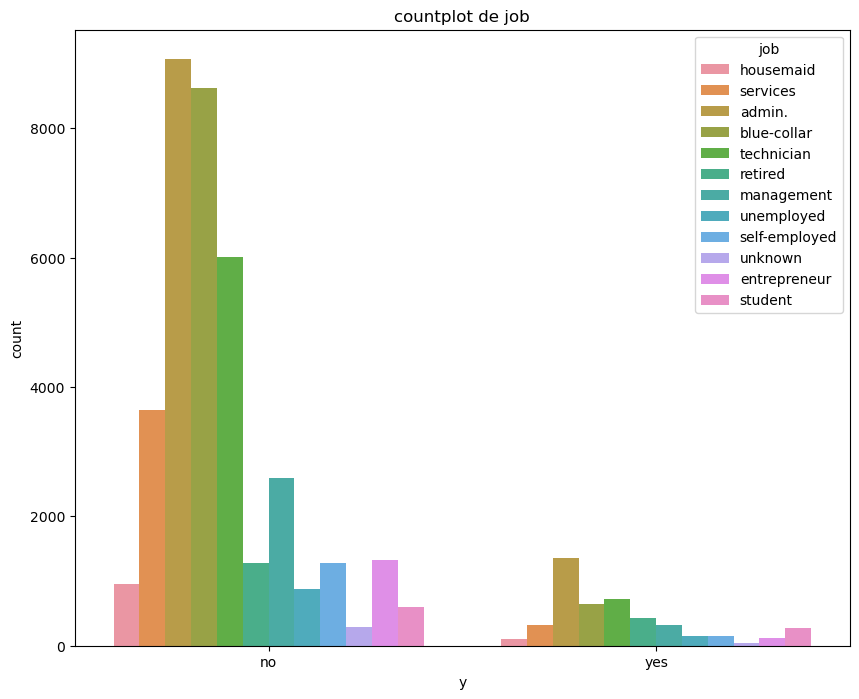

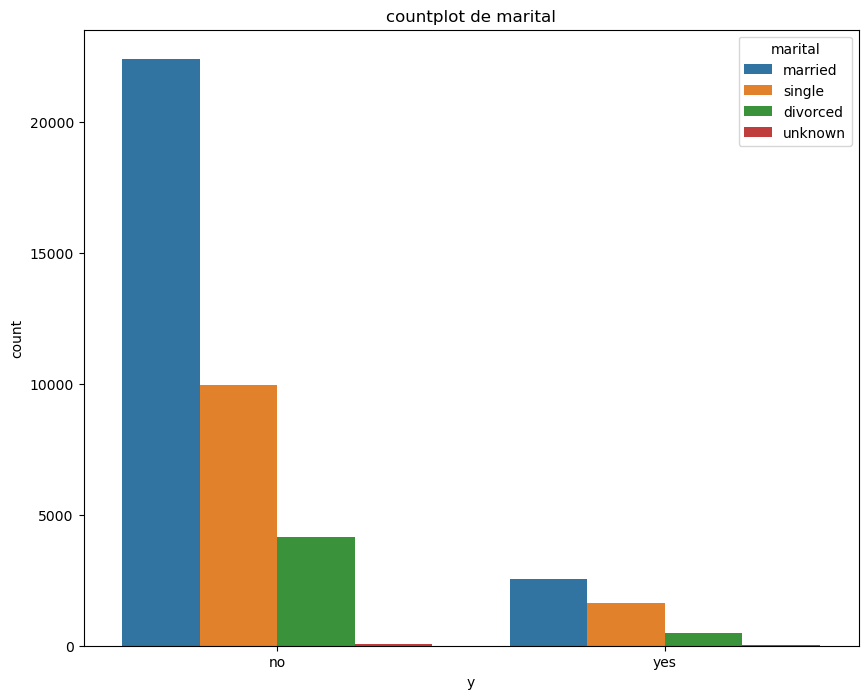

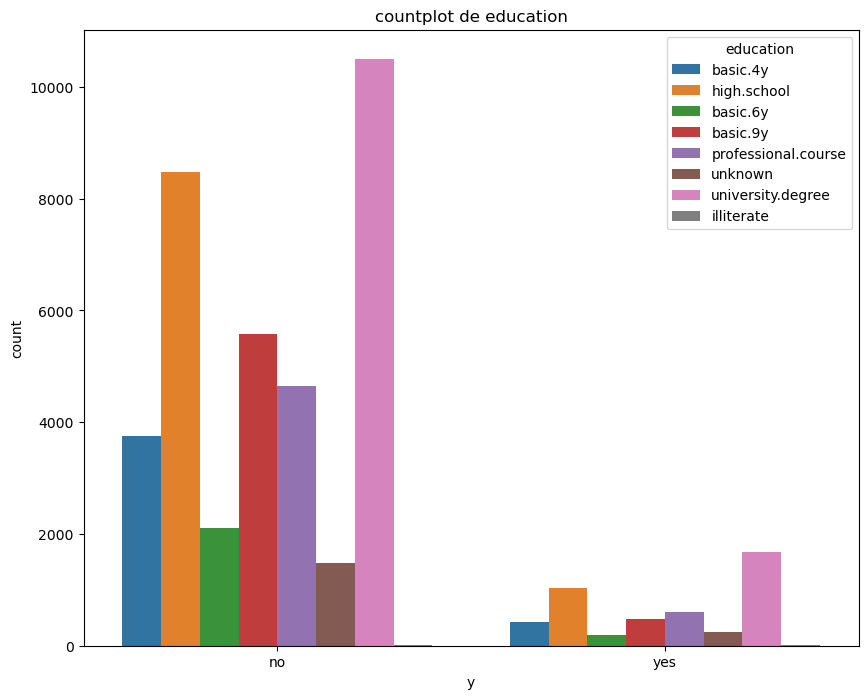

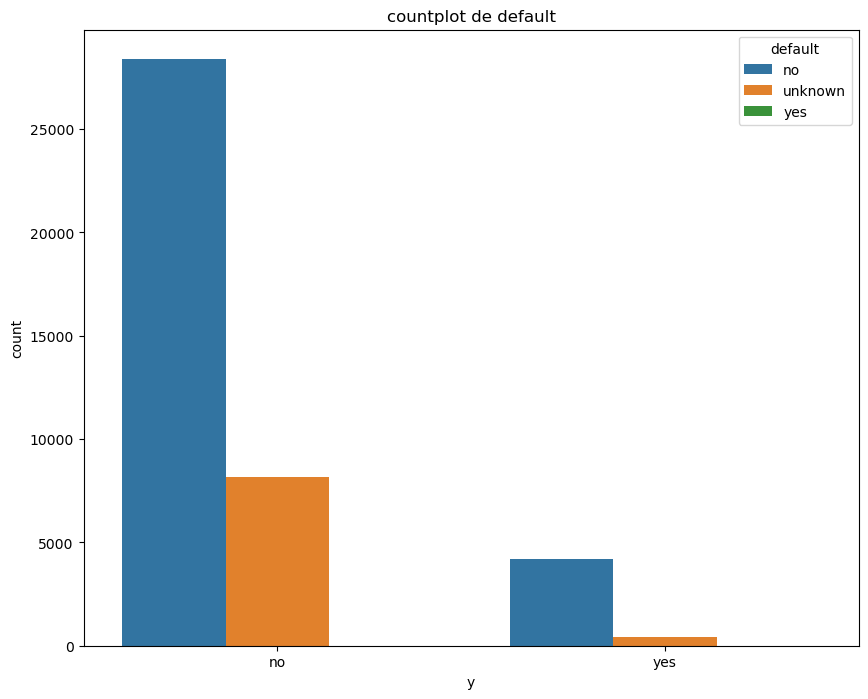

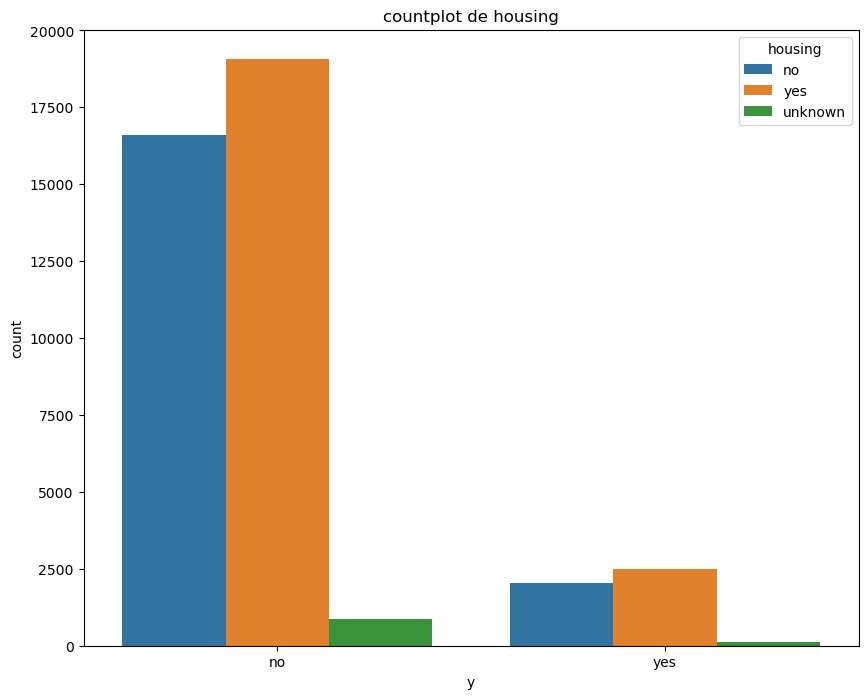

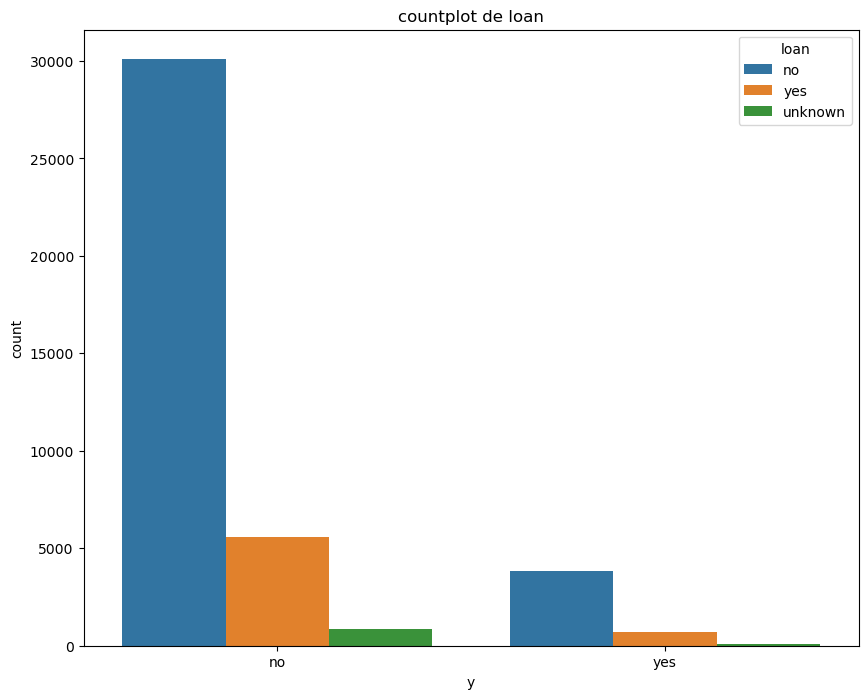

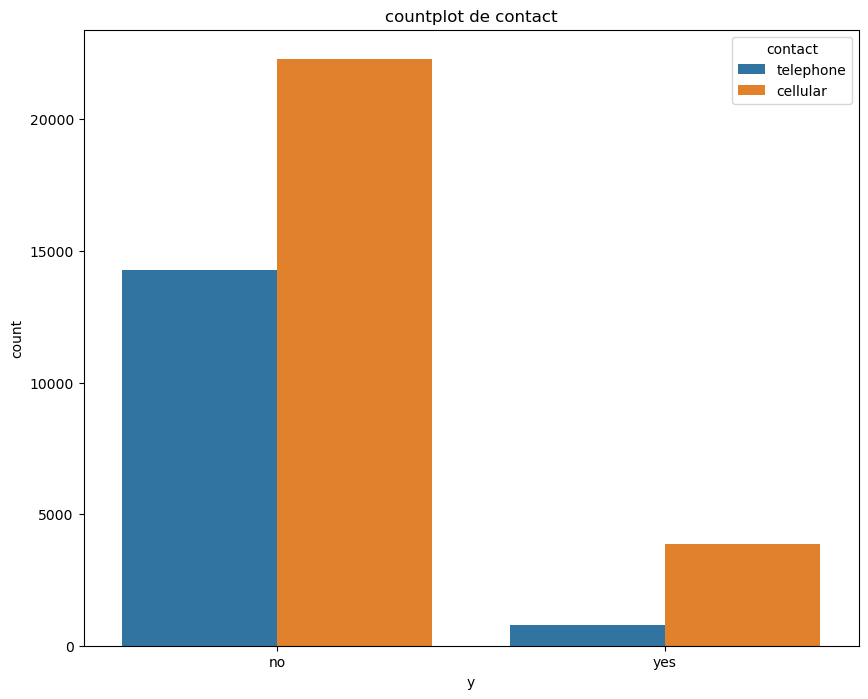

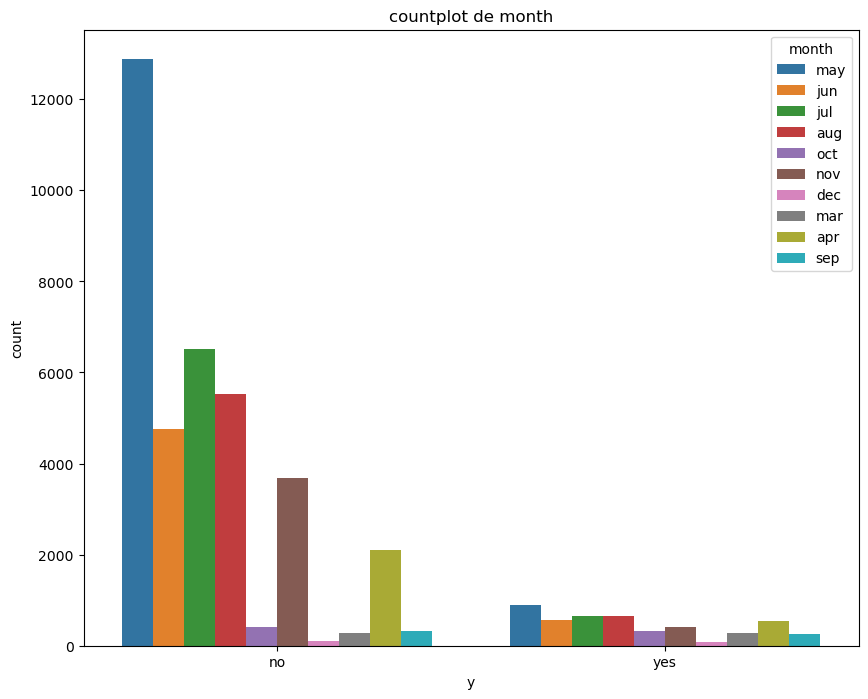

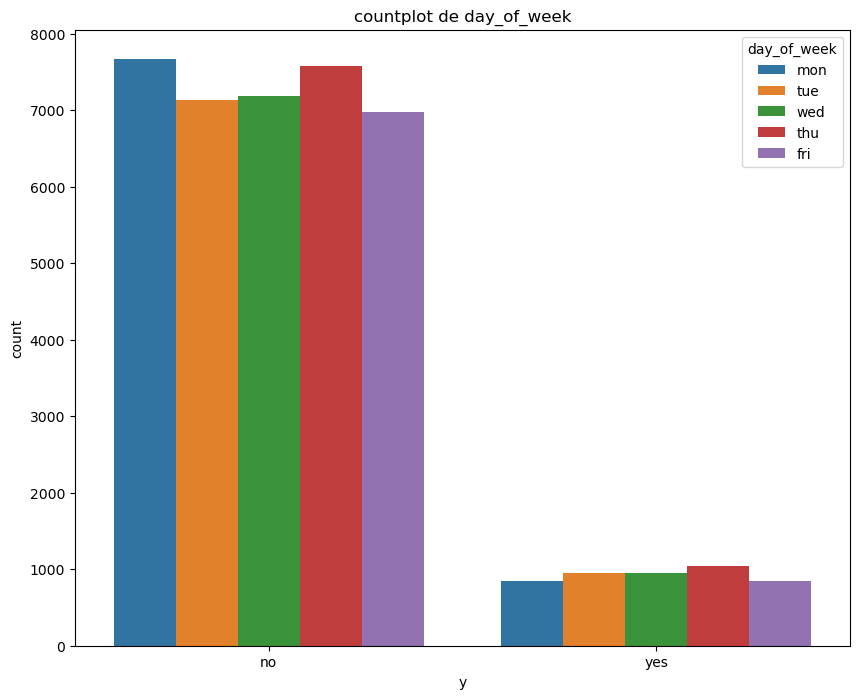

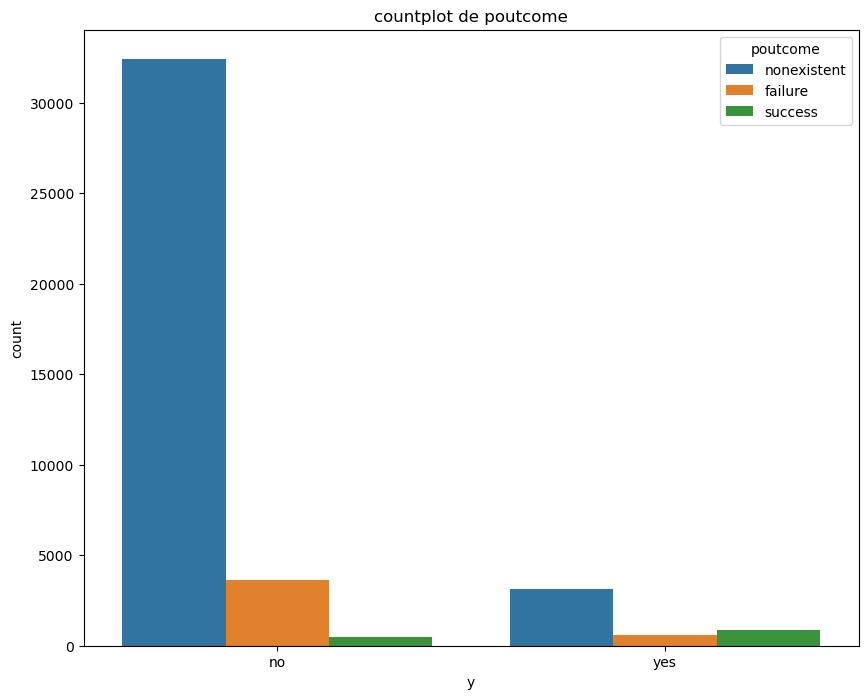

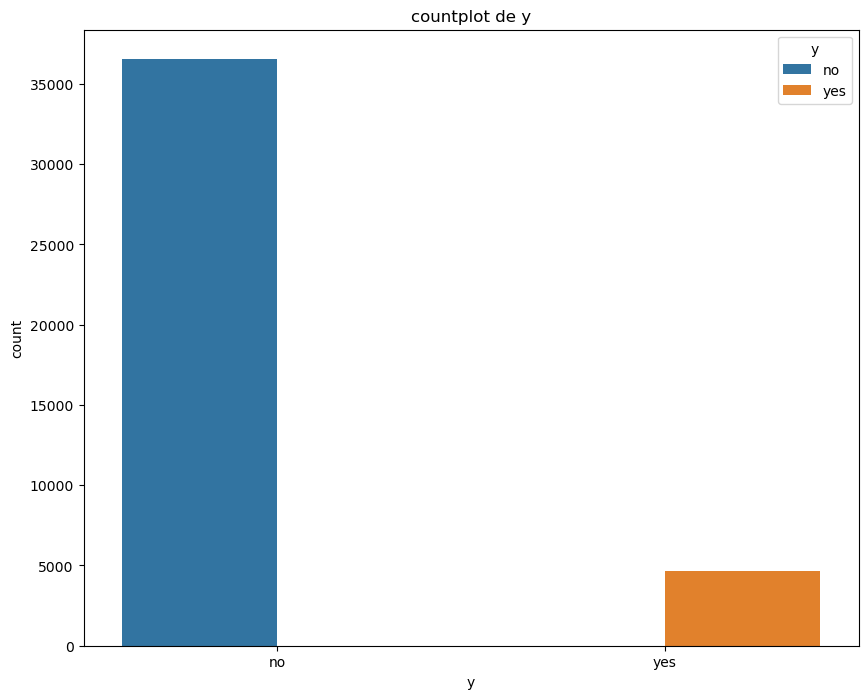

In [30]:
for categoria in categoricas:
    plt.figure(figsize=(10,8))
    sns.countplot(base_bank, x='y',hue=categoria)
    plt.title(f'countplot de {categoria}')
    plt.legend(title=categoria)

In [13]:
def frame_de_relacion(categoria):
    #separo la base en positivos y negativos
    yes_base_bank =base_bank[base_bank['y']=='yes']
    no_base_bank = base_bank[base_bank['y']=='no']
    
    #separo en categoria
    si =yes_base_bank.groupby(categoria).size()
    no= no_base_bank.groupby(categoria).size()
    
    #armo un nuevo dataframe con los valores de ambos
    si_df = pd.DataFrame({'si':si.values},index=si.index)
    no_df = pd.DataFrame({'no':no.values},index= no.index)

    d = pd.concat([si_df,no_df],axis=1)

    # veo la correlacion entre positivos y negativos dentro de la categoria

    d['relacion'] = d['si'] *100 / (d['si']+d['no']) 

    return d


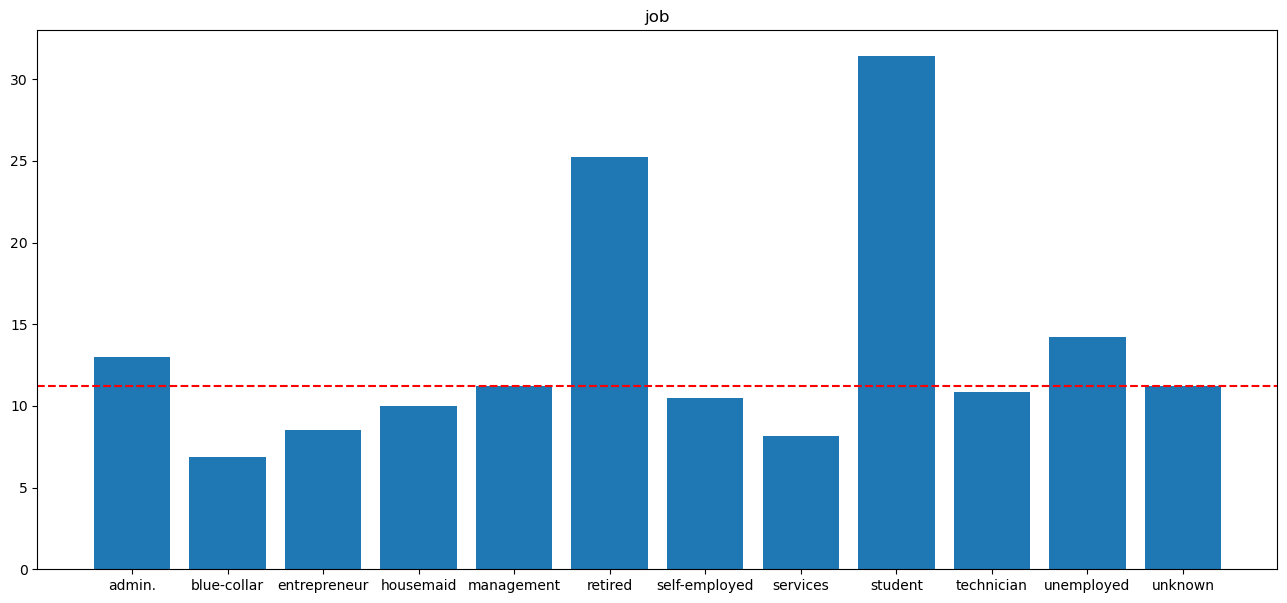

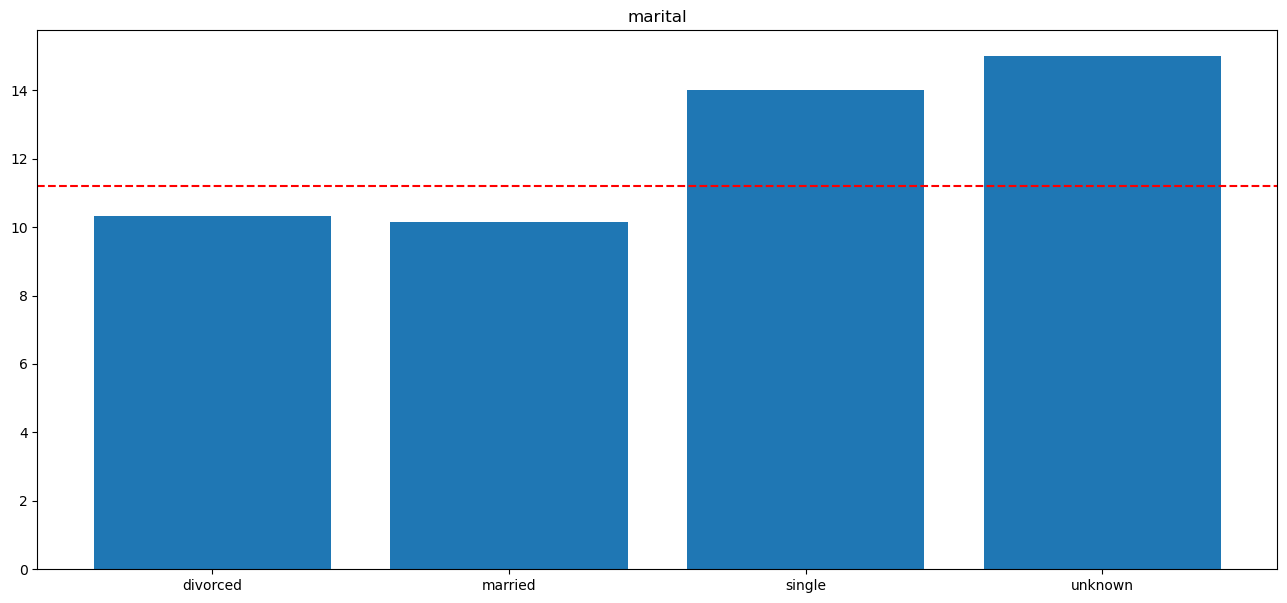

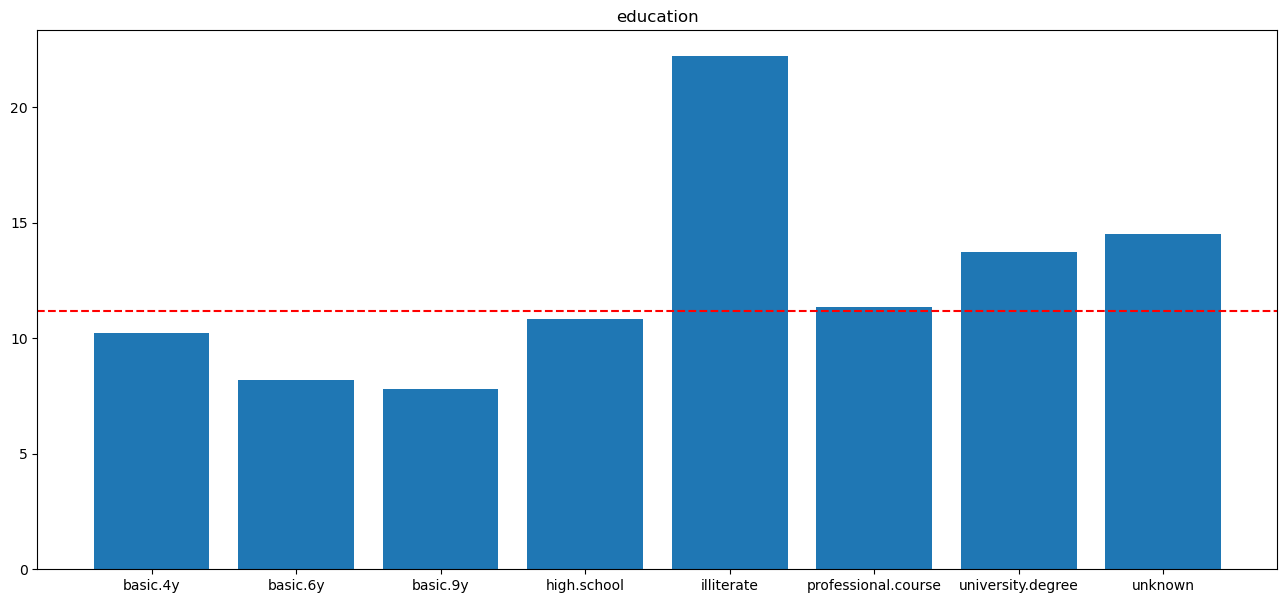

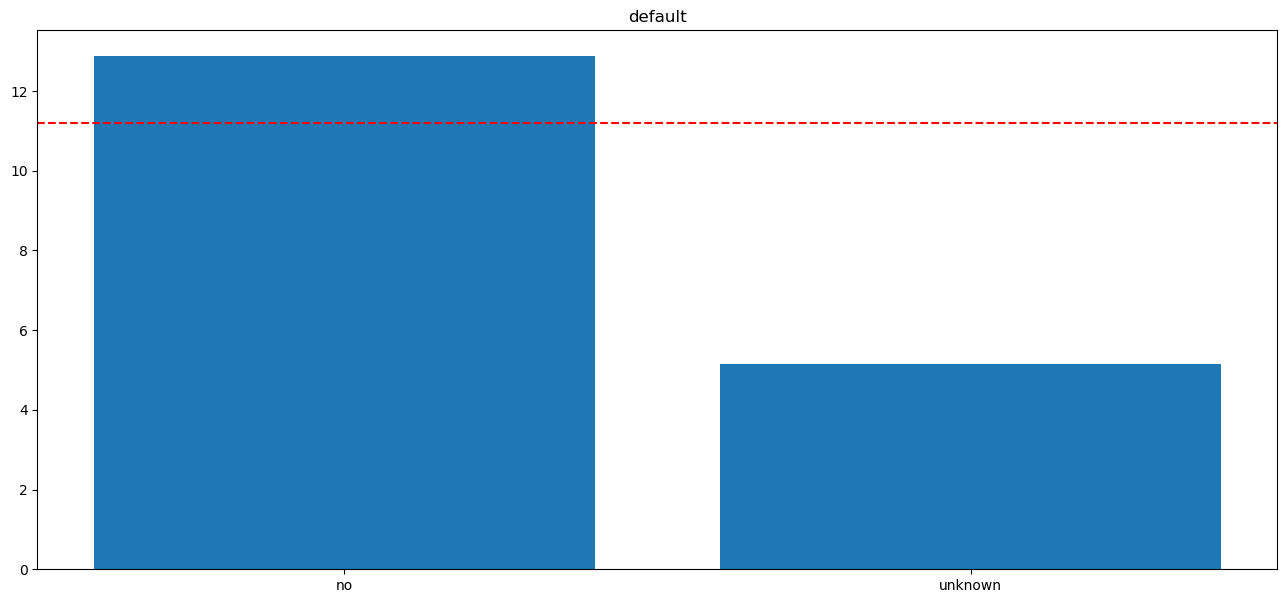

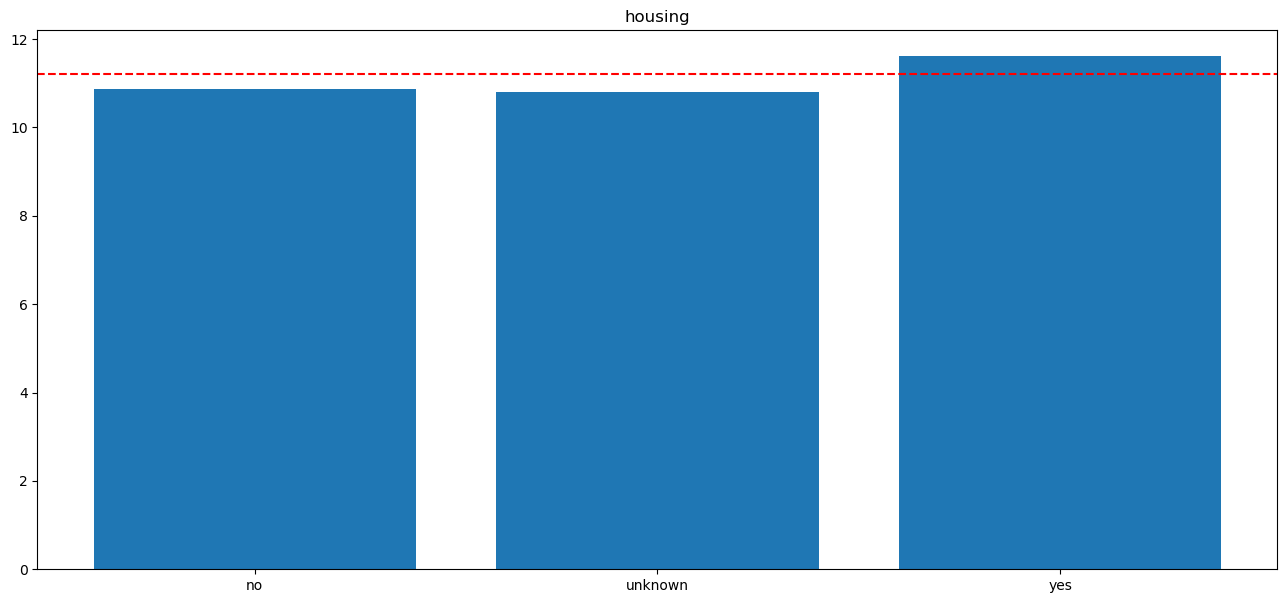

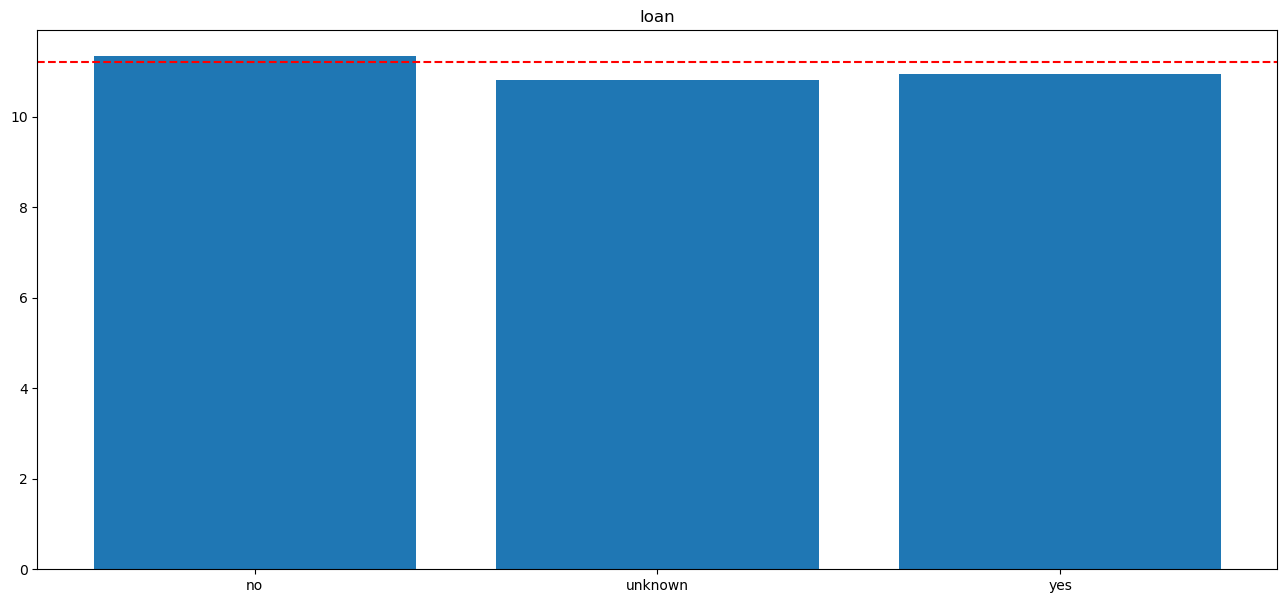

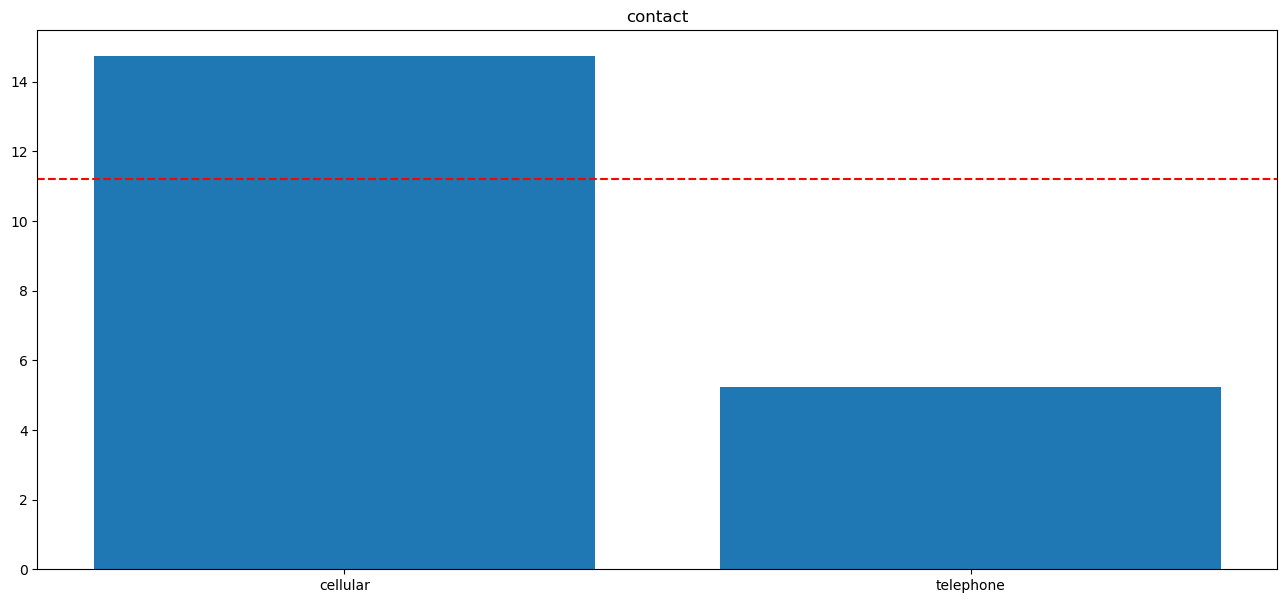

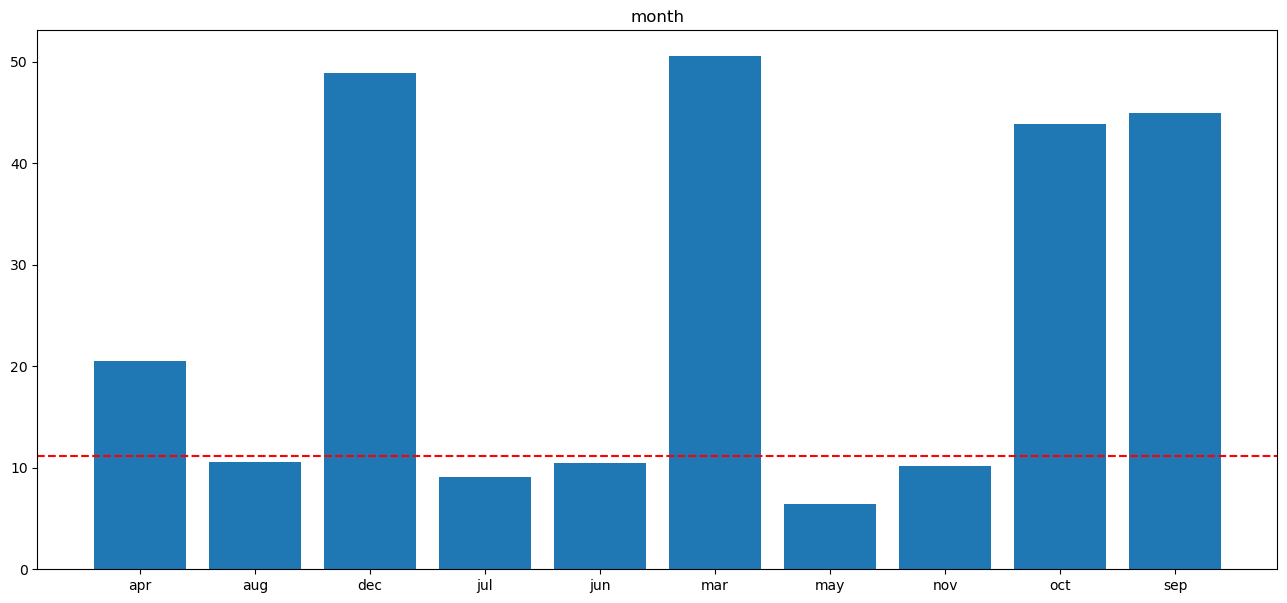

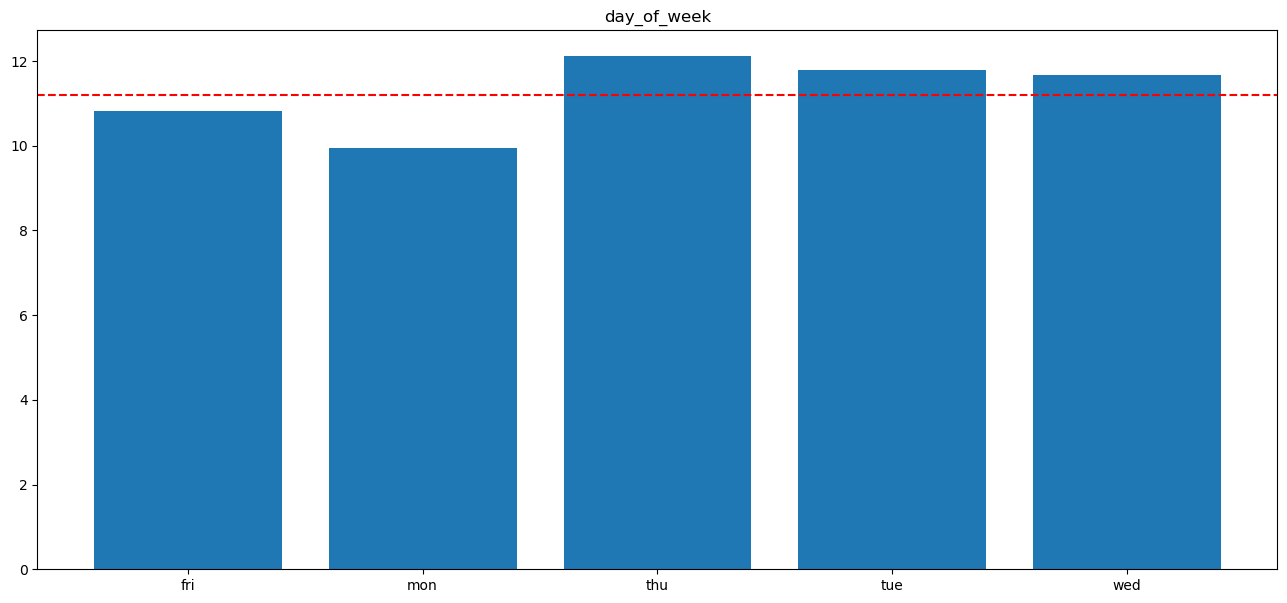

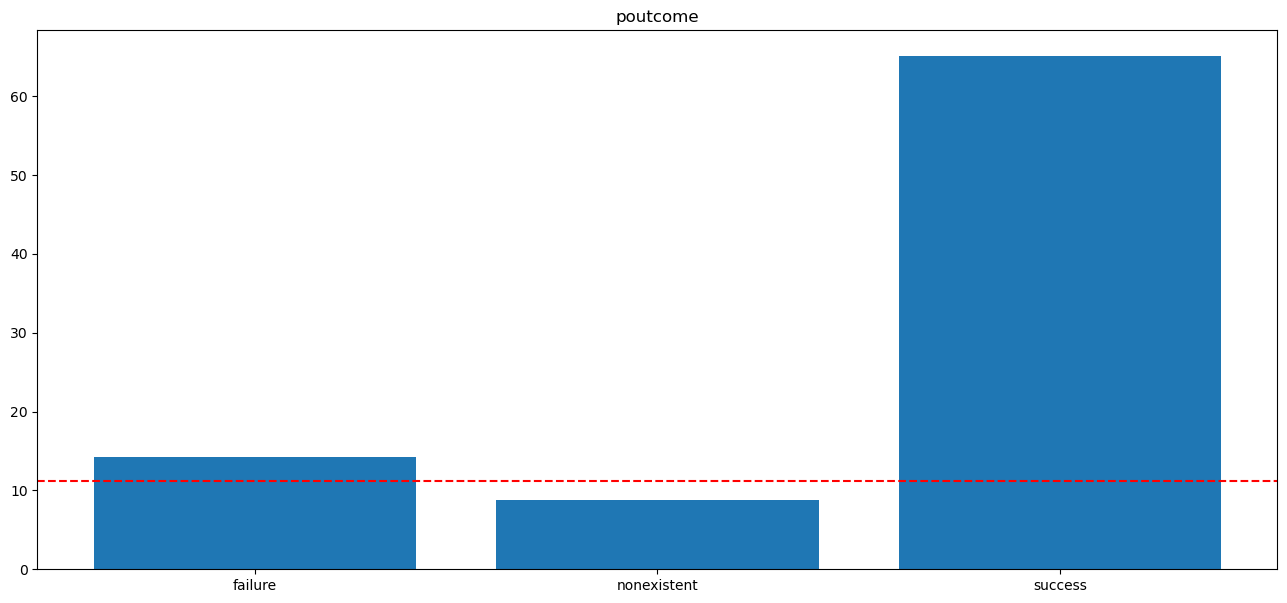

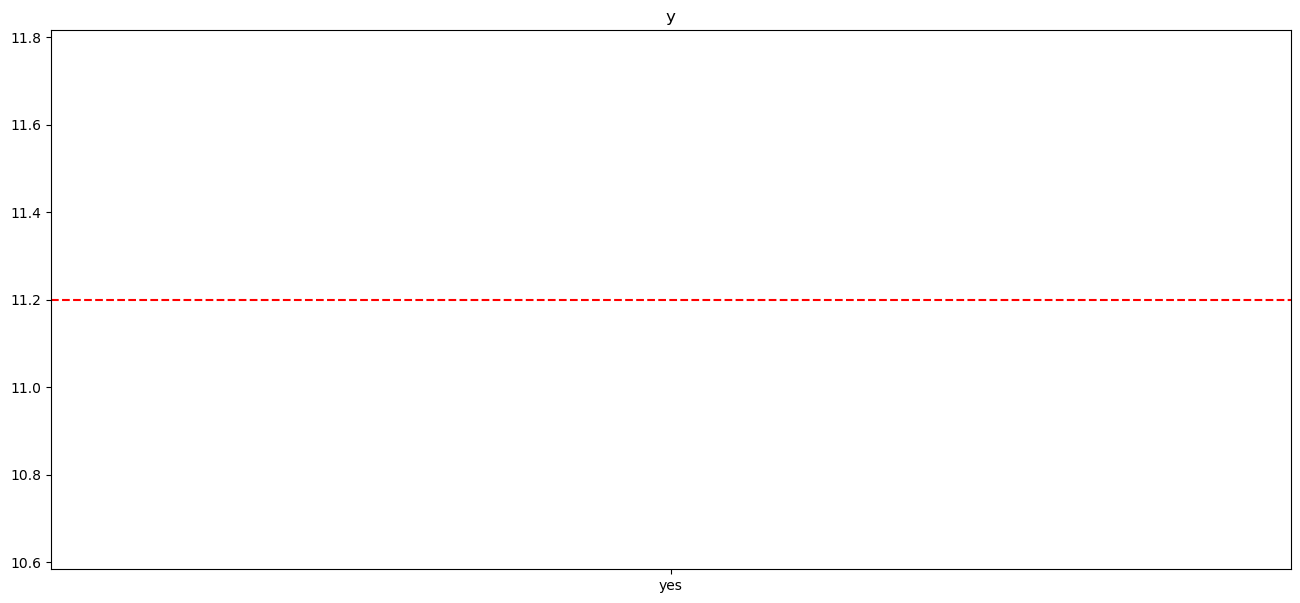

In [14]:
for categoria in categoricas:
    d = frame_de_relacion(categoria)
    plt.figure(figsize=(16,7))
    plt.bar(d.index,d['relacion'])
    plt.axhline(y= 11.2, color='r',linestyle='--', label= 'proporcion general')
    plt.title(categoria)

#### Variables numericas

In [15]:
base_bank.describe().columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

C:\Users\aleja\AppData\Local\Temp\ipykernel_7944\3736131570.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(base_bank[columna])
C:\Users\aleja\AppData\Local\Temp\ipykernel_7944\3736131570.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(base_bank[columna])
C:\Users\aleja\AppData\Local\Tem

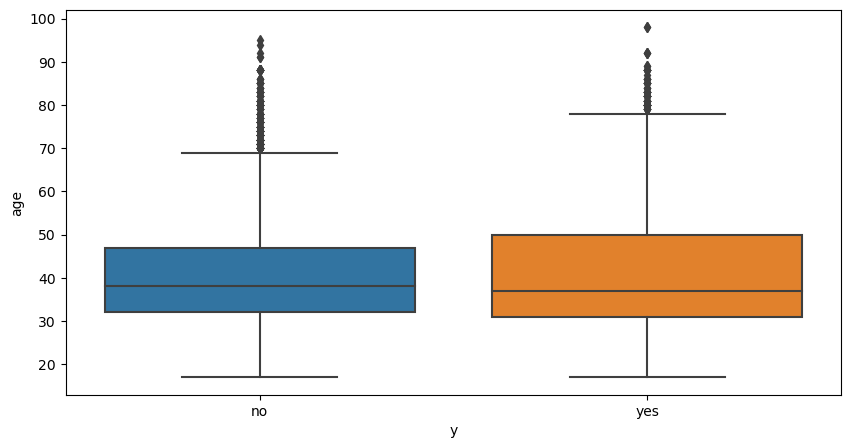

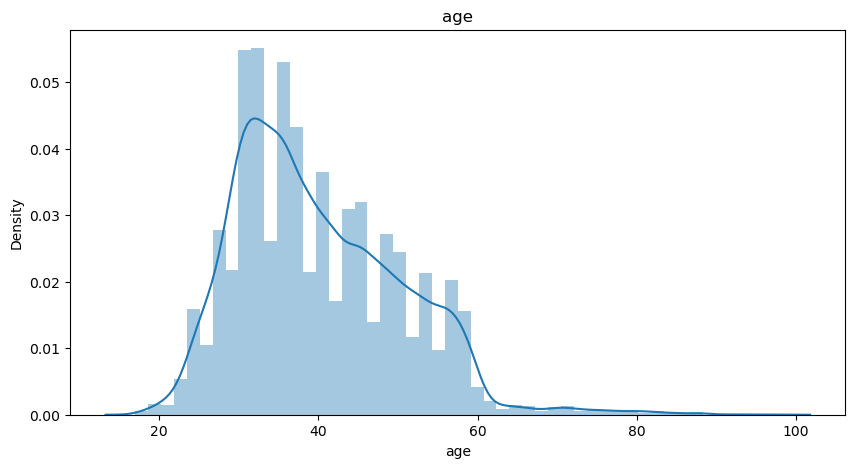

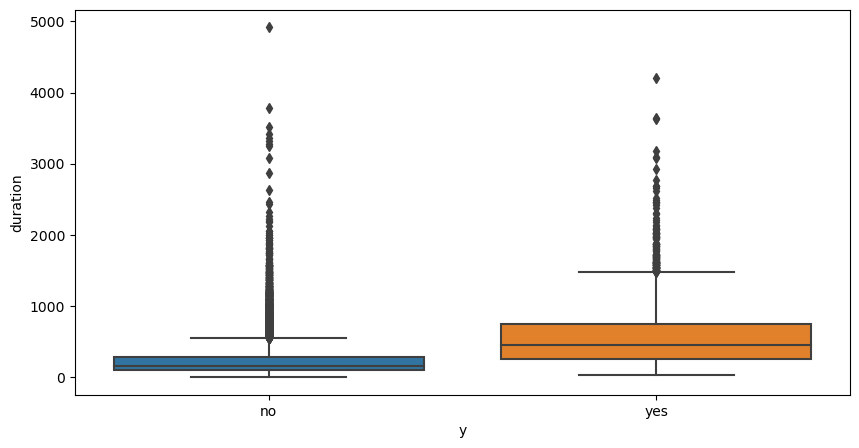

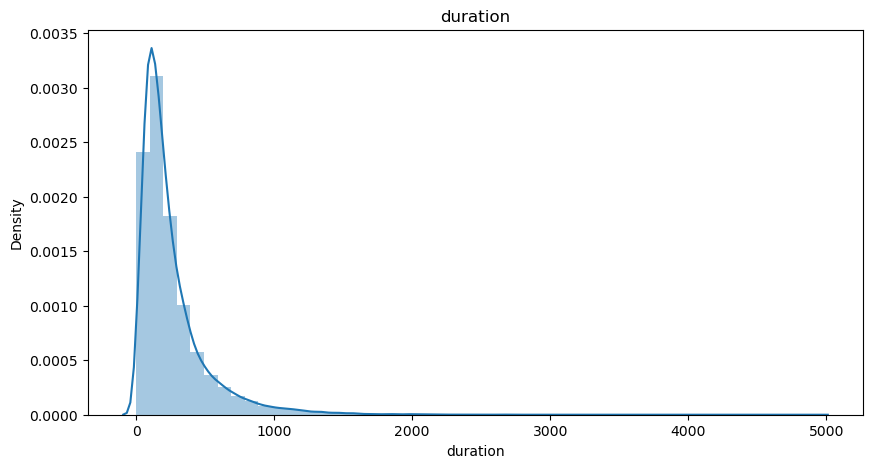

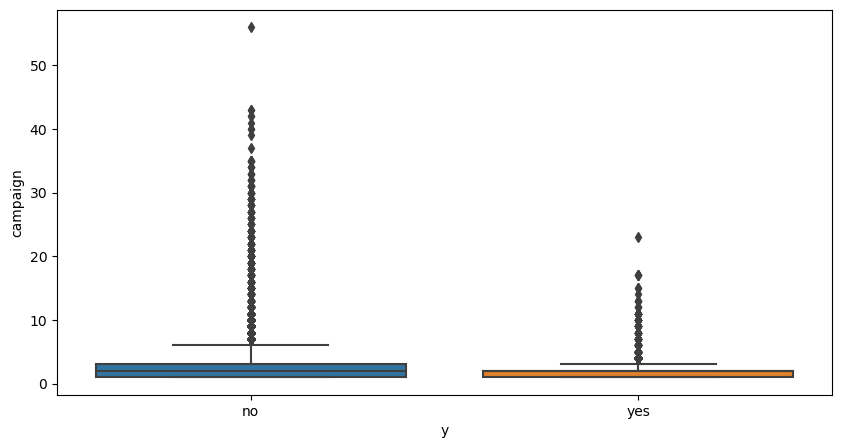

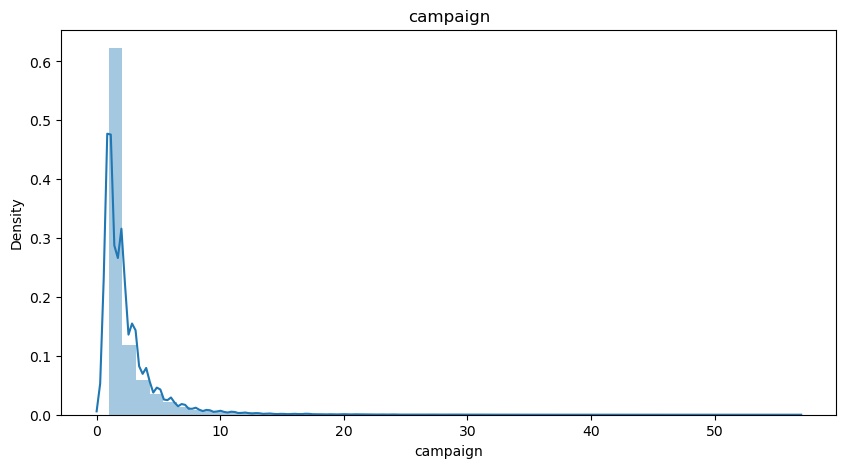

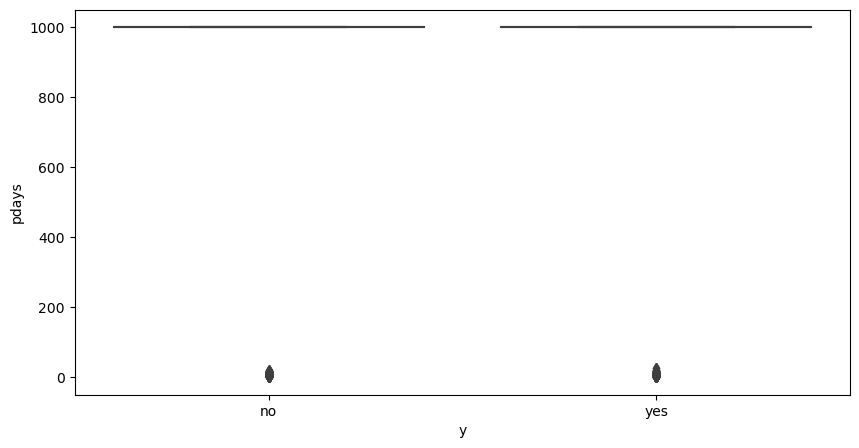

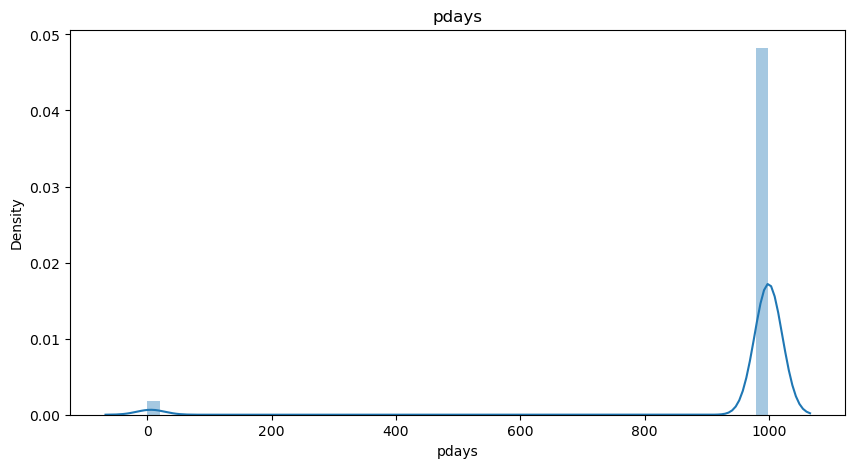

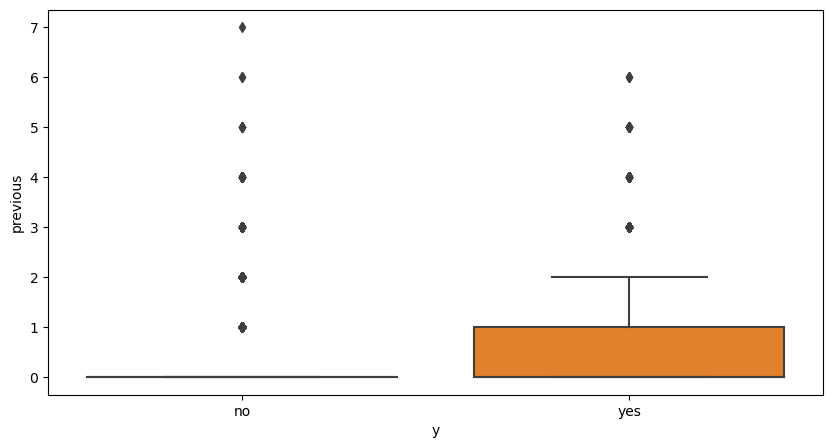

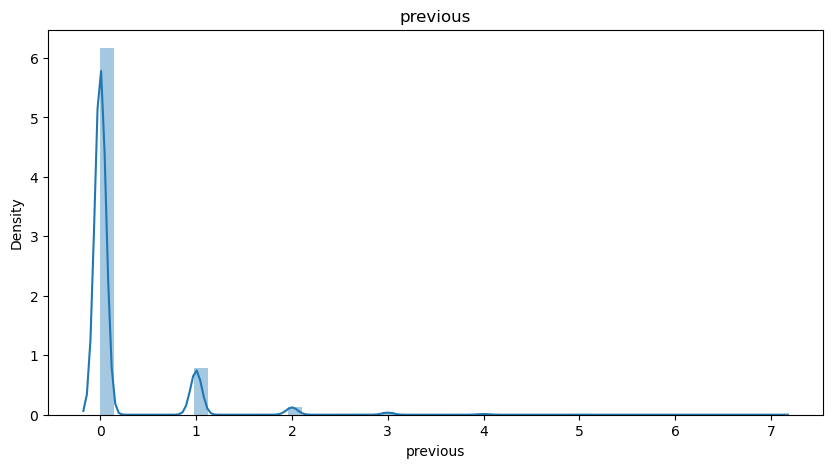

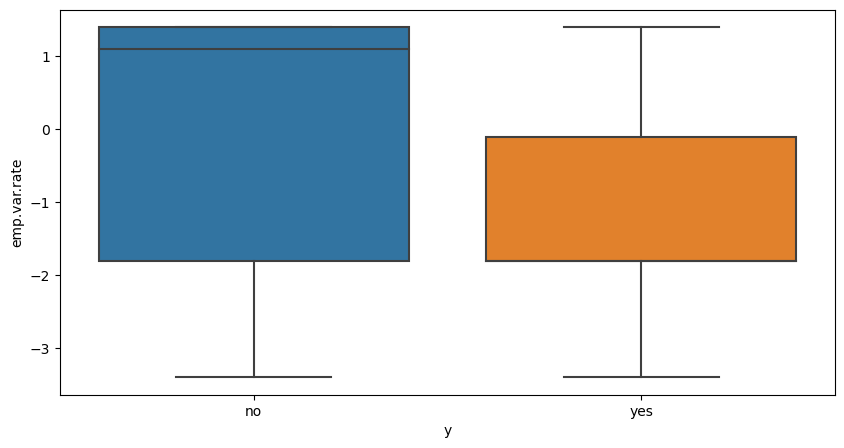

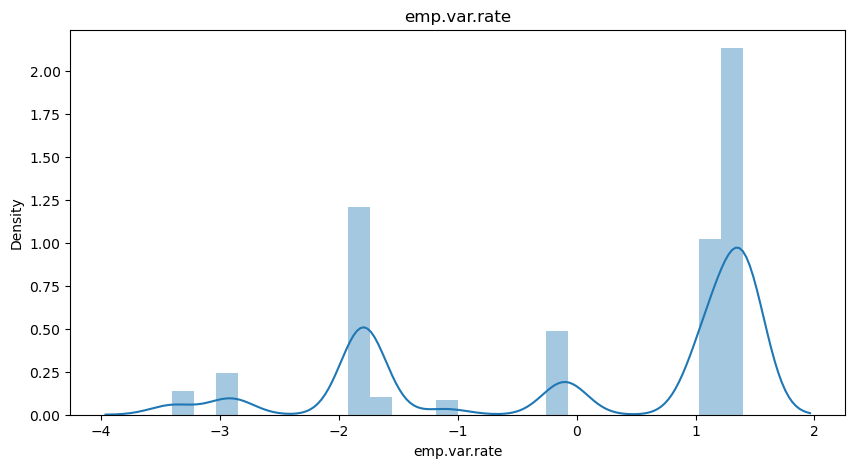

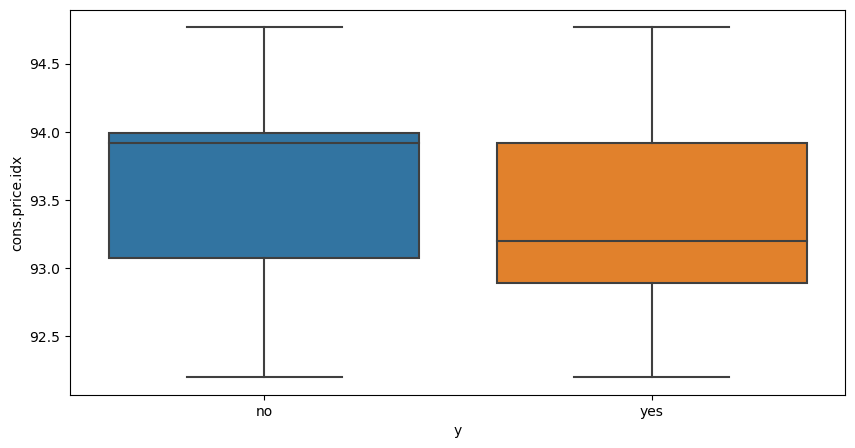

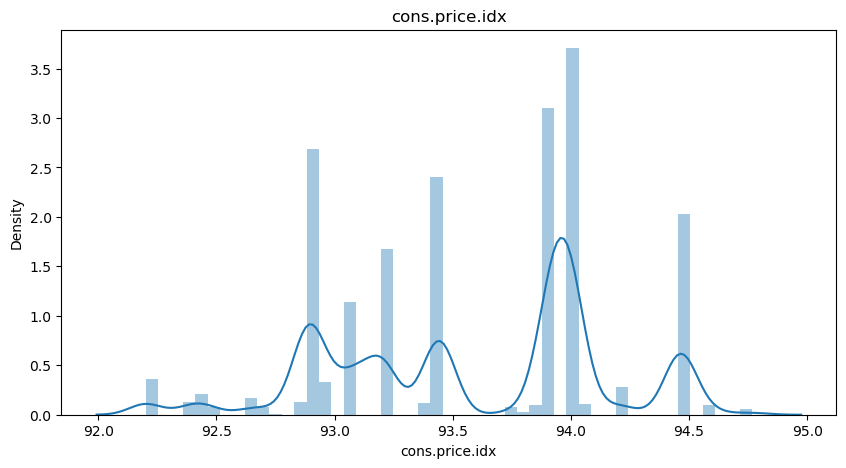

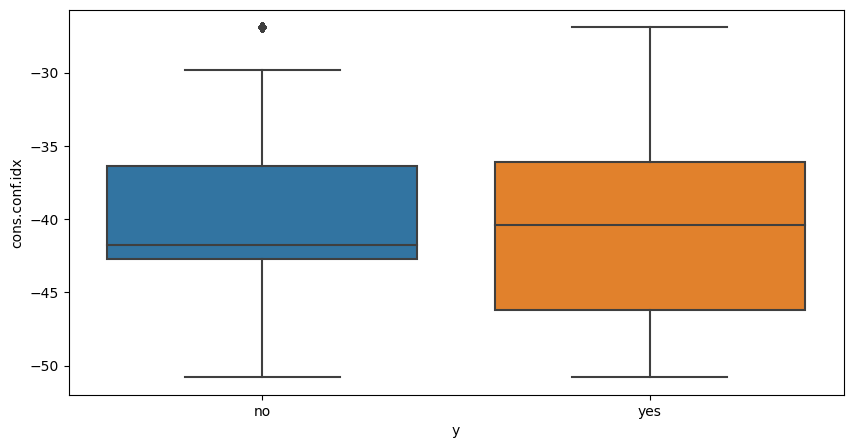

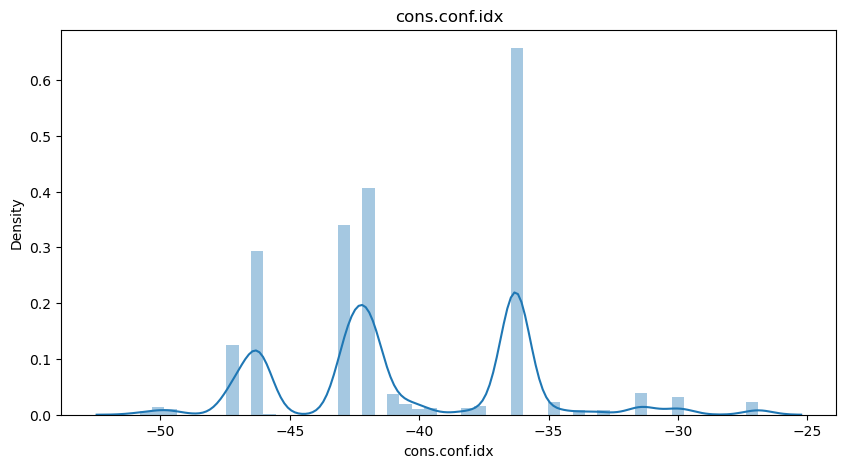

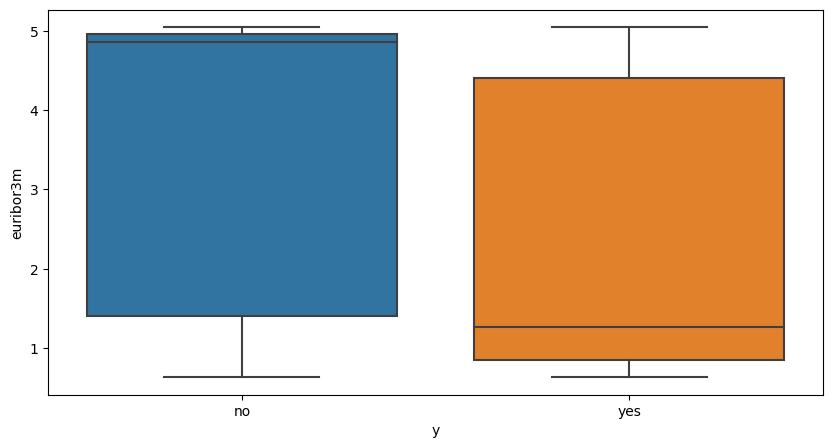

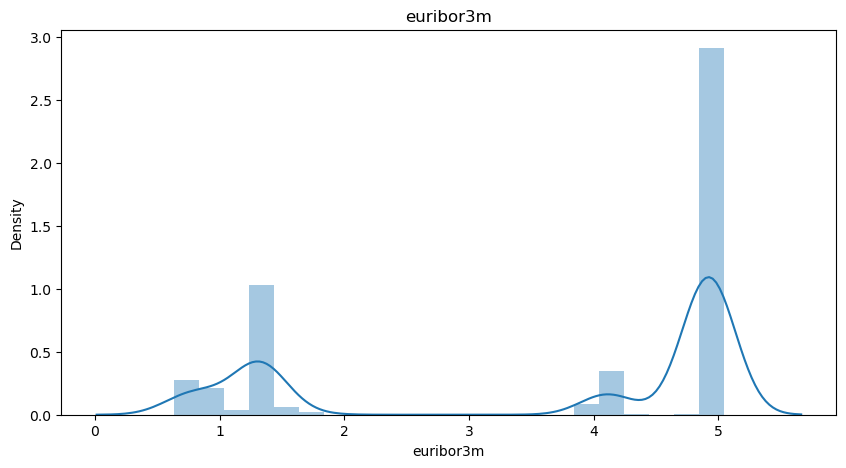

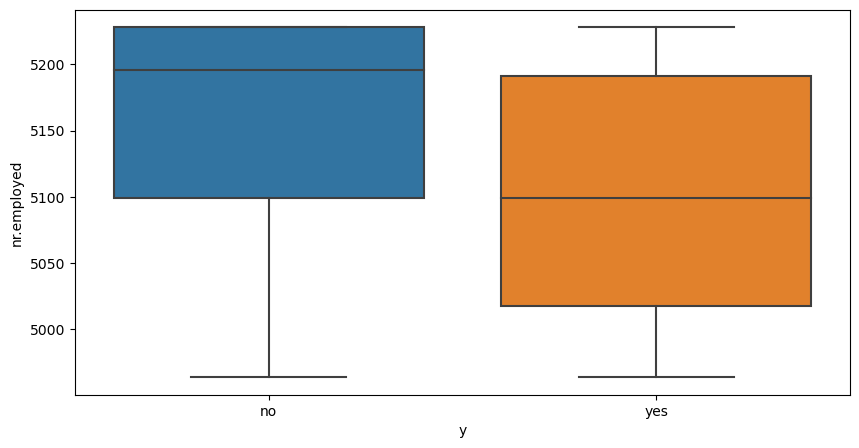

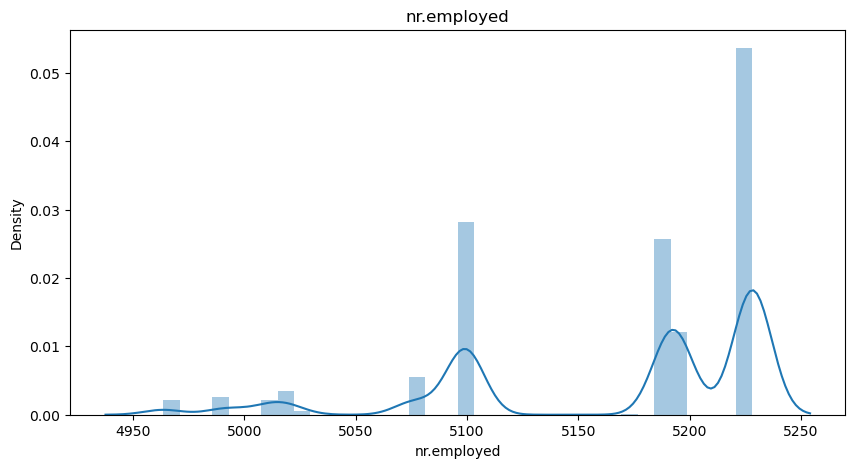

In [16]:
for columna in base_bank.describe().columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=base_bank,x='y', y=columna)
    plt.figure(figsize=(10,5))
    sns.distplot(base_bank[columna])
    plt.title(columna)

In [18]:
col= base_bank.describe().columns
base_bank_filtro= base_bank[col]


In [23]:
correlacion = base_bank_filtro.corr()
correlacion.style.background_gradient(cmap='Blues')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


### Limpieza de Base

Dentro del archivo txt enviado  se menciona la importacia de retirar la columna 'duration' para la realizacion de un modelo predictivo realista, 
dado que la variable target se ve ampliamente afectada. Puesto que la duracion de la llamada solo se conoce una vez realizada. 

In [24]:
base= base_bank.copy()

In [25]:
base = base.drop(columns='duration')

In [26]:
base

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [29]:
base.to_csv('base.csv',index=False)